In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
%matplotlib inline

In [2]:
#Basic Gantt chart since matplotlib's Gantt chart takes intervals and those
#require manual traversal of data and complex state maintenance and this
#doesn't need to be a super nice chart for our purposes.
def plot_log_data(log_data_list, var_name, var_value, spacing=10):
    ytick_values = list()

    figure = plt.figure(figsize=(20, 10))

    axes = figure.add_subplot(1, 1, 1)
    
    for log_num in range(len(log_data_list)):
        log_data = log_data_list[log_num]

        log_data_times = log_data.loc[log_data[var_name] == var_value, "time"]

        horizontal_line_y_values = [spacing * (log_num + 1) for _ in range(len(log_data_times))]

        ytick_values.append(spacing * (log_num + 1))

        axes.plot(log_data_times, horizontal_line_y_values, '-', color="blue")

    axes.set_title("Times where {0} = {1} by log number".format(var_name, var_value))

    axes.set_xlabel("time")
    
    axes.set_xlim([min(log_data["time"]), max(log_data["time"])])

    axes.set_yticks(ytick_values)

    axes.set_yticklabels(["Log {0}".format(_) for _ in range(len(ytick_values))])
    
    axes.set_ylabel("Log number")

In [3]:
#Constants for demonstration

In [4]:
#Some made-up data that is illustrative of what we are trying to do.
#Real-world data would work just as well.

times = np.linspace(0, 10, 100)

log_1_data = pd.DataFrame({
    "time" : times,
    "good_var" : [1 if 1 < t1 < 5 else 0 for t1 in times],
    "bad_var" : [1 if 6 < t2 < 10 else 0 for t2 in times]})

log_2_data = pd.DataFrame({
    "time" : times,
    "good_var" : [1 if 1 < t3 < 4.9 else 0 for t3 in times],
    "bad_var" : [1 if 4 < t4 < 6 else 0 for t4 in times]})

log_data = [log_1_data, log_2_data]

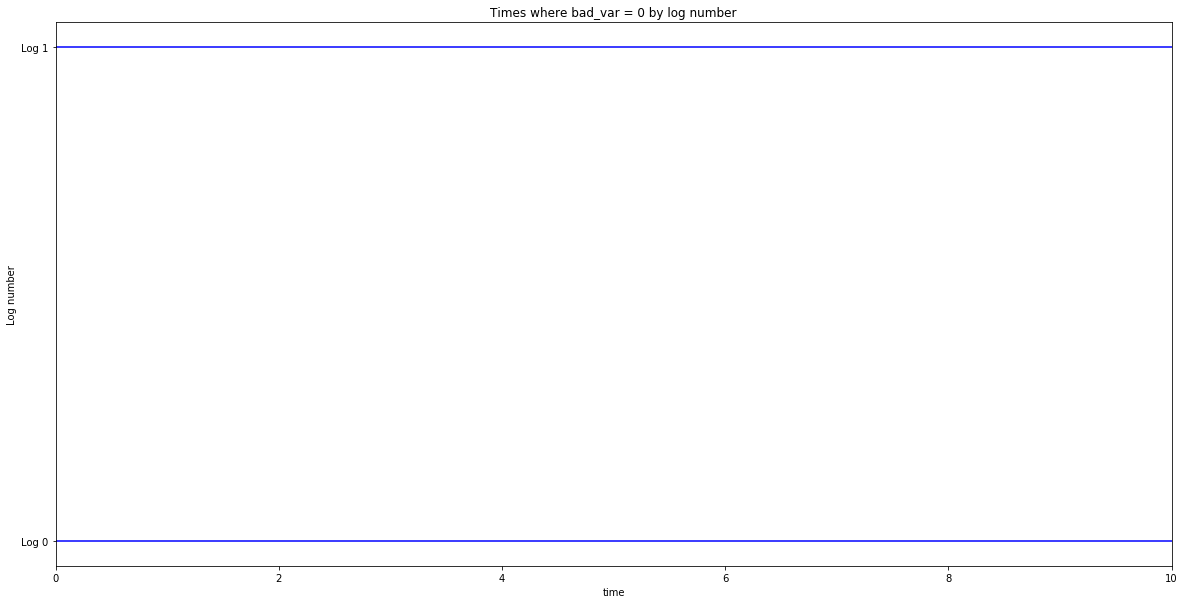

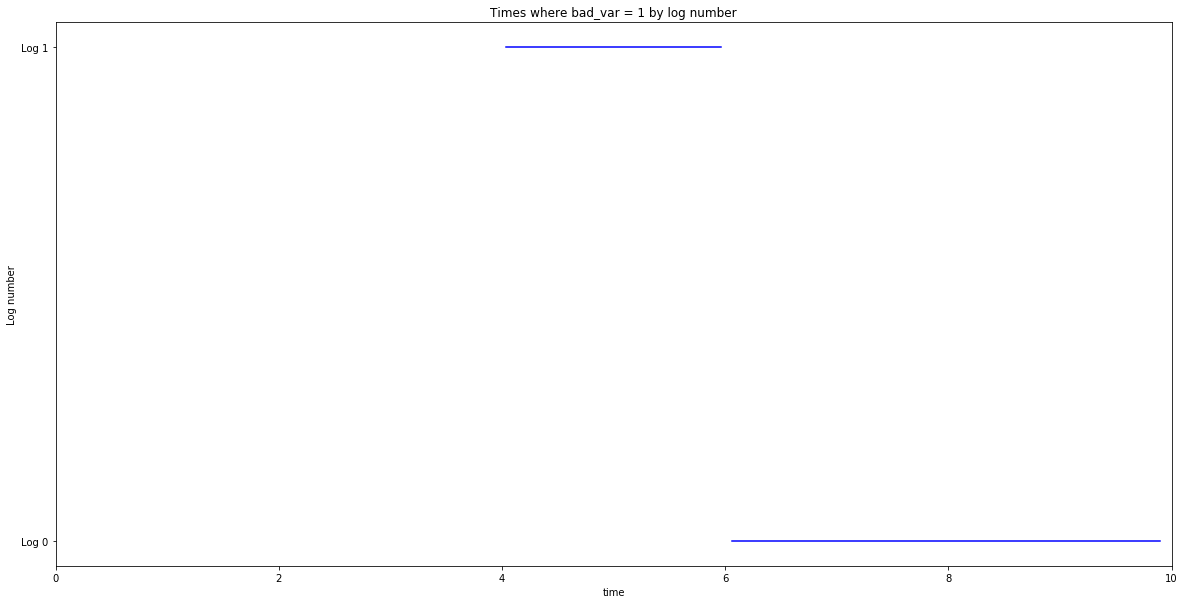

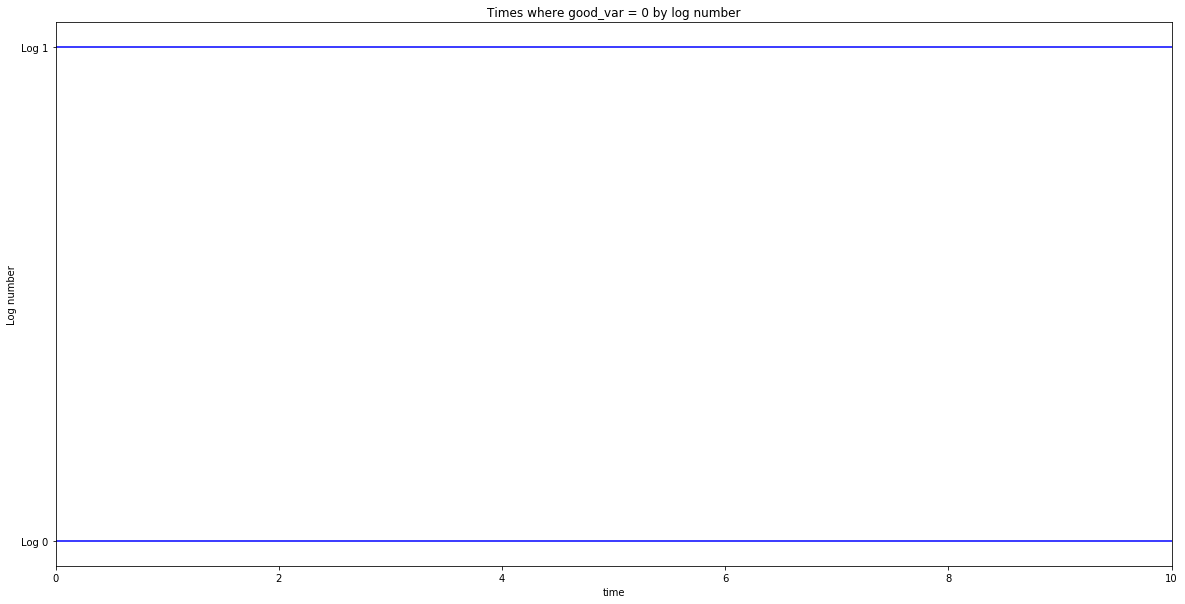

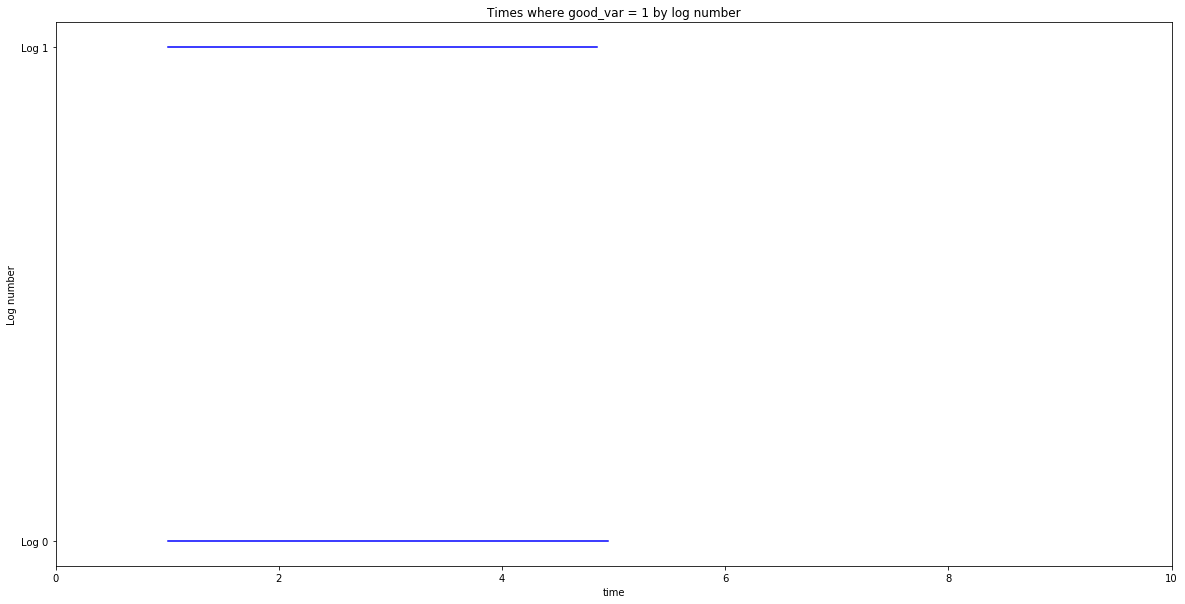

In [5]:
#Create graphs of each value of each variable in each log. Assume
#each log has same variables (time, good_var, bad_var) that log 1 has.
#Don't make graph for time since it is a continuous value.
for variable in set(log_1_data.columns):
    if variable == "time":
        continue
        
    for value in reduce(lambda x, y: set(x[variable]).union(y[variable]), log_data):
        plot_log_data(log_data, variable, value)

In [6]:
def find_intervals(log_data_list, var_name, var_value):
    intervals = [[] for _ in range(len(log_data_list))]
    
    for log_num in range(len(log_data_list)):
        log_data = log_data_list[log_num]
        
        log_data_times = log_data["time"]
        
        log_data_var = log_data[var_name]
        
        #TODO: There's probably a more efficient way to do this.
        start_time = None
        
        for index in range(len(log_data_var)):
            #print("index: {0}, start_time: {1}, time: {2}, value: {3}, var_value: {4}".format(
            #    index, start_time, log_data_times[index], log_data_var[index], var_value))
            
            if log_data_var[index] != var_value and start_time is not None:
                intervals[log_num].append((start_time, log_data_times[index]))
                start_time = None
            elif log_data_var[index] == var_value and start_time is None:
                start_time = log_data_times[index]
            
    return intervals

In [7]:
for variable in set(log_1_data.columns):
    if variable == "time":
        continue
        
    for value in reduce(lambda x, y: set(x[variable]).union(y[variable]), log_data):
        print("Intervals for variable {0}, value {1}".format(variable, value))
        
        intervals = find_intervals(log_data, variable, value)
        
        for index in range(len(intervals)):
            print("Run {0} intervals: {1}".format(index, intervals[index]))

Intervals for variable bad_var, value 0
Run 0 intervals: [(0.0, 6.0606060606060606)]
Run 1 intervals: [(0.0, 4.040404040404041)]
Intervals for variable bad_var, value 1
Run 0 intervals: [(6.0606060606060606, 10.0)]
Run 1 intervals: [(4.040404040404041, 6.0606060606060606)]
Intervals for variable good_var, value 0
Run 0 intervals: [(0.0, 1.0101010101010102)]
Run 1 intervals: [(0.0, 1.0101010101010102)]
Intervals for variable good_var, value 1
Run 0 intervals: [(1.0101010101010102, 5.05050505050505)]
Run 1 intervals: [(1.0101010101010102, 4.94949494949495)]
